Model Performance Comparison:
                 Model  Accuracy  Precision    Recall  F1-Score       AUC
0  Logistic Regression  0.804469   0.774648  0.743243  0.758621  0.875676
1        Decision Tree  0.720670   0.657895  0.675676  0.666667  0.714028
2        Random Forest  0.832402   0.823529  0.756757  0.788732  0.897619
3                  SVM  0.810056   0.812500  0.702703  0.753623  0.863707
4                  KNN  0.804469   0.782609  0.729730  0.755245  0.860682


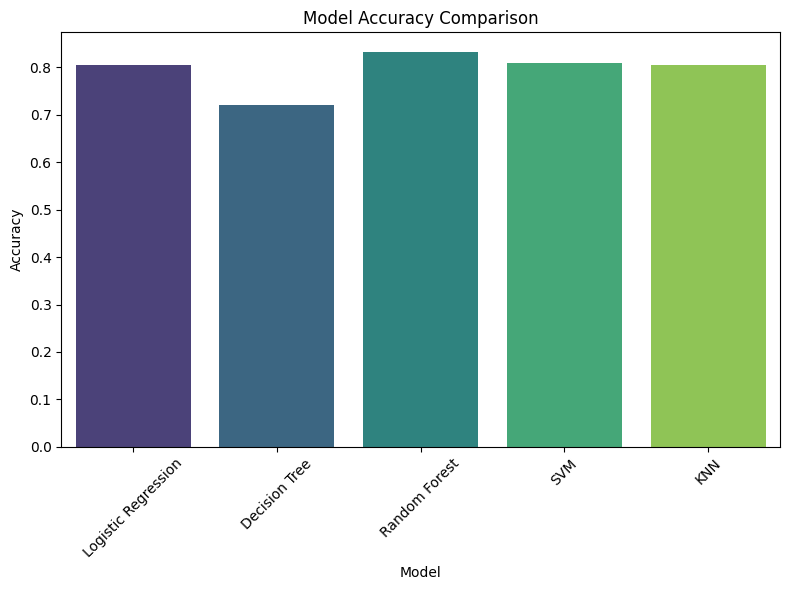

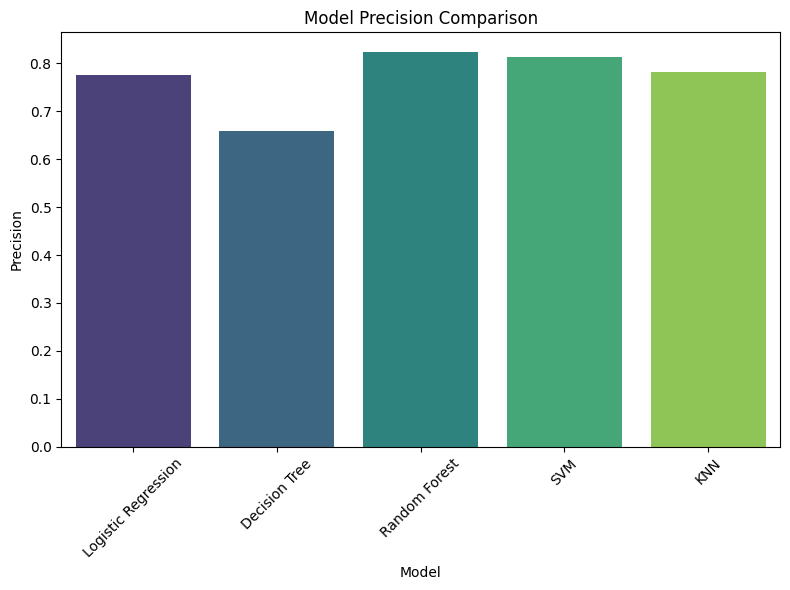

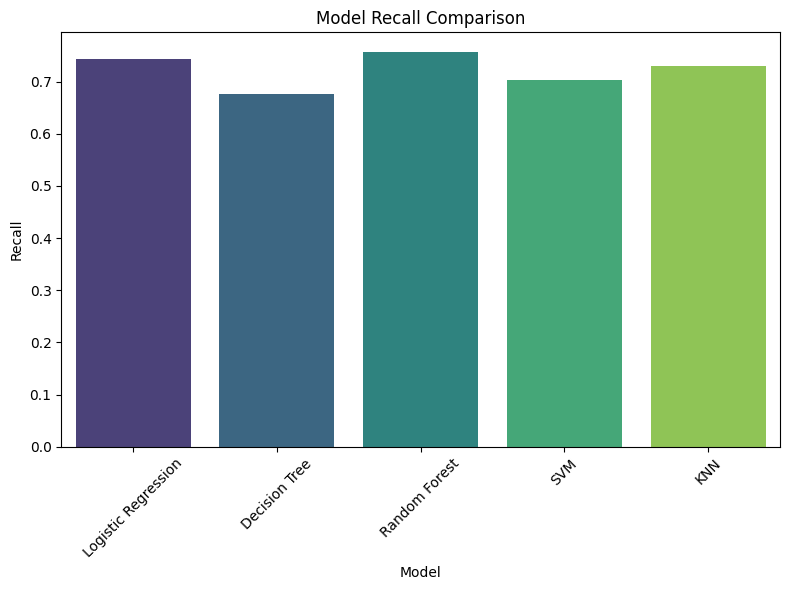

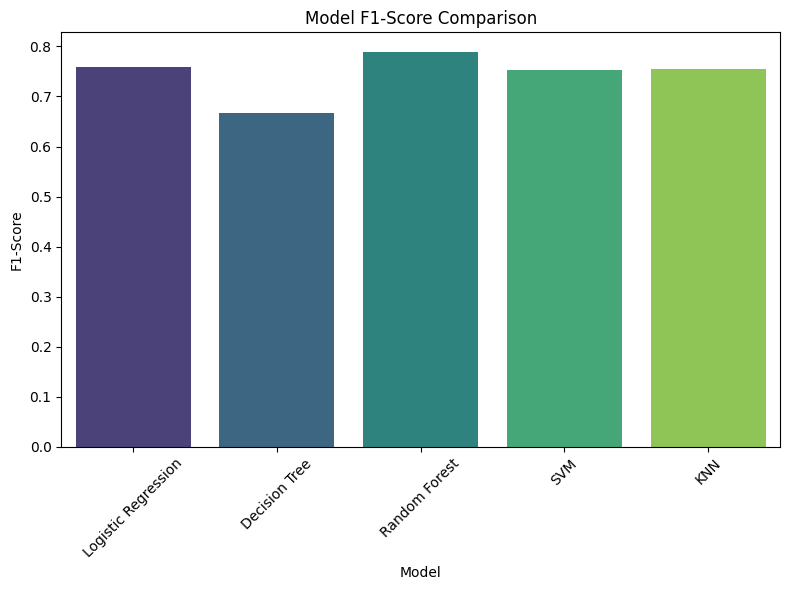

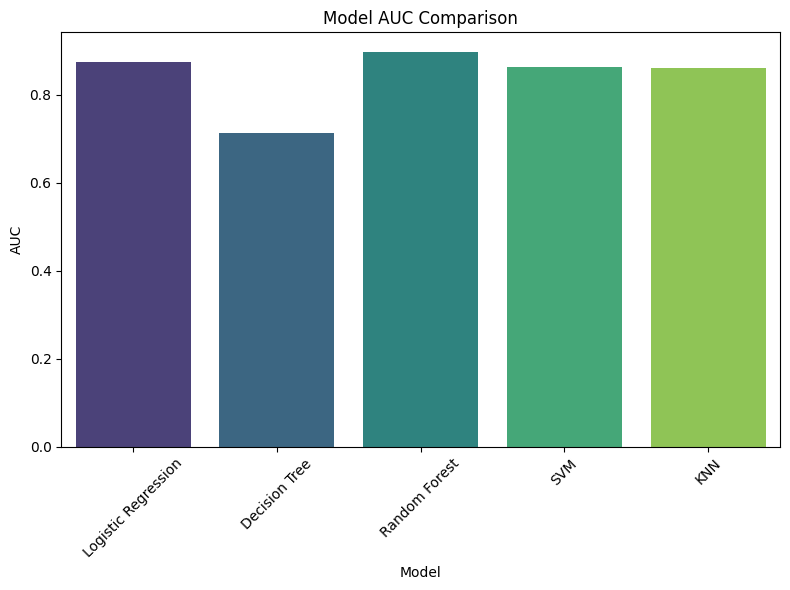

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

# Data preprocessing
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data['Fare'] = data['Fare'].fillna(data['Fare'].median())
data.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

# Encoding categorical variables
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Splitting the dataset
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate models
results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC': auc
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
print("Model Performance Comparison:")
print(results_df)

# Visualize all metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']

# Plot each metric
for metric in metrics:
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Model', y=metric, data=results_df, palette='viridis', hue='Model', dodge=False, legend=False)
    plt.title(f'Model {metric} Comparison')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
